##  Goal of the project

We will analyze the local and global temperature data and compare the temperature trends where we live (the closest city to us) to overall global temperature trends.

## Outline
Steps taken to prepare the data to be visualized:
*  Use **SQL** query to import data from the table global_data and export it in the global_temp csv file (it contains the global data). The code is 

```

      SELECT *
   
      FROM  global_data
```

* Use **SQL** query to import data from the tables city_data and city_list and  export it in local_temp csv file (It contains the city level data) by following the steps below:

    1 Check the city_list to see which cities are available for my country (Canada) by using the code below
   
      SELECT  *
   
      FROM city_list
   
      WHERE country='Canada'
   
   
    2 Import the data corresponding to my country (Canada) and the city closest to me (Victoria) by using the code below
   
      SELECT *
   
      FROM city_data
   
      WHERE country='Canada' and city='Victoria'
   
   
* Create the dataframe called **df_global** using the global data and the datarframe called **df_local** using the city level data. Check for null values. If they exist, remove them. We need the python's **pandas library** for this task.


* Evaluate the moving averages using the function called moving_average written in **Python** (see the code below)
   with the aid of the **numpy library**.


* Visualization. We use **matplotlib.pyplot library** to visualize the global and local temperature trends using 5-year moving averages, 10-year moving averages and 30-year moving averages. Since both the moving averages and the year are continuous variables we use lines to visualize the trends. See the observations below.

* Visualize the relationship between global and local temperature using a sctterplot and then compute the correlation coefficient. (approximately equal to 0.59). The scatterplot indicates some linear relationship. See the picture below.

* Using the **statsmodel library** we can fit the least square line to the data. The least square line is 


$$ \text{local_temp}=1.0490 \text{global_temp}-1.6685$$

### Create a dataframe called df_global using the global data. Check for null values. If they exist, remove them

In [1]:
import pandas as pd
df_global=pd.read_csv("global_temp.csv")#Create the dataframe for global data called df_global
print(f'The dimensions of the dataframe are {df_global.shape} \n')
print("The number of null values for each column are: \n")
print(df_global.isna().sum(),"\n") #Check for the null values. Running this line shows that there is no null values
print("The first 10 rows of the global data table are:")
df_global.head(10)

The dimensions of the dataframe are (266, 2) 

The number of null values for each column are: 

year        0
avg_temp    0
dtype: int64 

The first 10 rows of the global data table are:


,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47
5,1755,8.36
6,1756,8.85
7,1757,9.02
8,1758,6.74
9,1759,7.99


### Create a dataframe called df_local using the city level data. Check for null values.

In [2]:
df_local=pd.read_csv("local_temp.csv")
print(f'The dimensions of the dataframe are {df_local.shape} \n')
print('The number of null values for each column are:')
df_local.isna().sum()#There are three null values in the column called avg_temp

The dimensions of the dataframe are (186, 4) 

The number of null values for each column are:


year        0
city        0
country     0
avg_temp    3
dtype: int64

### Remove the null values from df_local dataframe. Then call the resulting dataframe by df_local_new

In [3]:
mask=df_local['avg_temp'].notna() # it removes the null values from the column avg_temp
df_local_new=df_local[mask]
df_local_new.head(10)

,year,city,country,avg_temp
0,1828,Victoria,Canada,6.83
1,1829,Victoria,Canada,6.58
4,1832,Victoria,Canada,3.25
5,1833,Victoria,Canada,7.27
6,1834,Victoria,Canada,6.81
7,1835,Victoria,Canada,5.35
8,1836,Victoria,Canada,6.52
9,1837,Victoria,Canada,6.61
10,1838,Victoria,Canada,6.37
11,1839,Victoria,Canada,7.12


### Compute 5-year moving averages for both global data and city level-data using the functon called moving_average

In [4]:
import numpy as np
def moving_average(arr,interval):
    '''This function computes the interval-year moving averages'''
    temp=[]
    assert interval<len(arr)
    for k in range(len(arr)-interval+1):
        temp.append(np.average(arr[k:interval+k]))
    return np.array(temp)
    

In [5]:
global_moving_average_5=moving_average(df_global['avg_temp'].values,5) #5-year moving averages for global data
local_moving_average_5=moving_average(df_local_new['avg_temp'].values,5)#5-year moving averages for local data
print('The fist 10 moving averages for the global data are: ',global_moving_average_5[:10]) #print the first 
#10 moving averages for global data
print('The first 10 moving averages for the local data are: ',local_moving_average_5[:10]) #print the first 10 
#moving averages for local data

The fist 10 moving averages for the global data are:  [7.868 7.796 7.97  8.618 8.288 8.192 7.958 7.942 7.86  8.012]
The first 10 moving averages for the local data are:  [6.148 5.852 5.84  6.512 6.332 6.394 6.614 6.628 6.634 6.61 ]


## Visualization
* Visualize the global and local temperature trends using 5-year moving averages, 10-year moving averages and 30-year moving averages

### Observations
* The records for the global temperature start from 1750 (df_global['year'].min()) and on but the records for the local temeperature start from 1828 (df_local_new['year '].min()).

* Based on Figure 1 and Figure 2 (see below) we can see that the world is getting hotter. Especially from 1825 (approximately) the global temperature increases constantly and in a consistent manner. Also, in the period 1750 -1800, the global temperature line shows records of high temperature  except for the period 1800-1810, where we see the rapid decrease in the global temperature. As far as the local temperature is concerned, figure 1 and figure 2 reveal that the local temperature presents an increasing and consistent trend as well except for the period 1940-1950 (approximately), where we have a record of unusual high and low temperature.

* According to figure 1 and figure 2 the temperature in my city has been lower than the global temperature. The differences in two temperatures are consistent from 1850 and on except for the period 1940-1950. The global average temperature over all years (=8.37, see the summary statistics below) is larger than the average temperature over all years in my city (=7.26)

* Figure 3 shows that the rate of change in the global and local temperature is almost the same for the period 1875-1925 and it is almost connstant. For the period 1925-1950 (approximately) the rate of increase in the temperature gets bigger with the global rate of increase to be slighly bigger than the local one. For the period 1975 and after, the rate of increase for both temperatures is bigger than in the previous periods and both lines show alomost the same slope. 

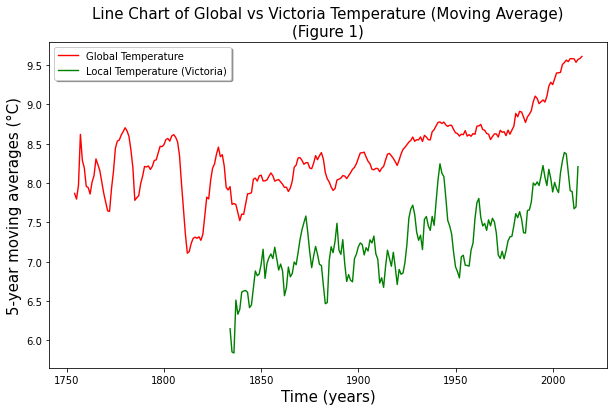

In [6]:
import matplotlib.pyplot as plt
interval=5
plt.figure(figsize=(10,6))
plt.plot(df_global['year'][interval-1:],global_moving_average_5,color="red",lw=1.4,label="Global Temperature")
plt.plot(df_local_new['year'][interval-1:],local_moving_average_5,color="green",lw=1.4,label="Local Temperature (Victoria)")
plt.title("Line Chart of Global vs Victoria Temperature (Moving Average)\n(Figure 1)",fontsize=15)
plt.ylabel(f"{interval}-year moving averages (°C)",fontsize=15)
plt.xlabel("Time (years)",fontsize=15)
plt.legend(shadow=True)


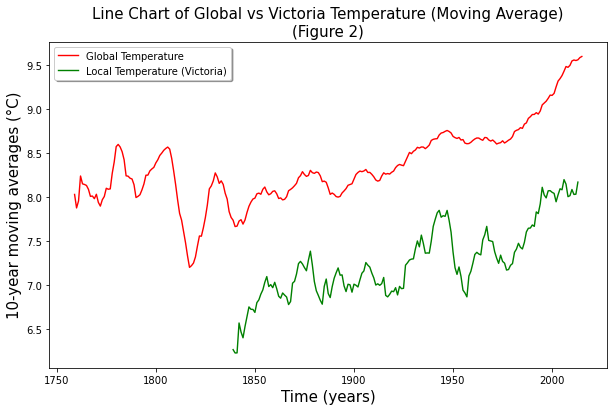

In [7]:
interval=10
global_moving_average_10=moving_average(df_global['avg_temp'].values,interval) #10-year moving averages 
#for the global data

local_moving_average_10=moving_average(df_local_new['avg_temp'].values,interval)#10-year moving averages 
#for local data

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df_global['year'][interval-1:],global_moving_average_10,color="red",lw=1.4,label="Global Temperature")
plt.plot(df_local_new['year'][interval-1:],local_moving_average_10,color="green",lw=1.4,label="Local Temperature (Victoria)")
plt.title("Line Chart of Global vs Victoria Temperature (Moving Average)\n(Figure 2)",fontsize=15)
plt.ylabel(f"{interval}-year moving averages (°C)",fontsize=15)
plt.xlabel("Time (years)",fontsize=15)
plt.legend(shadow=True)

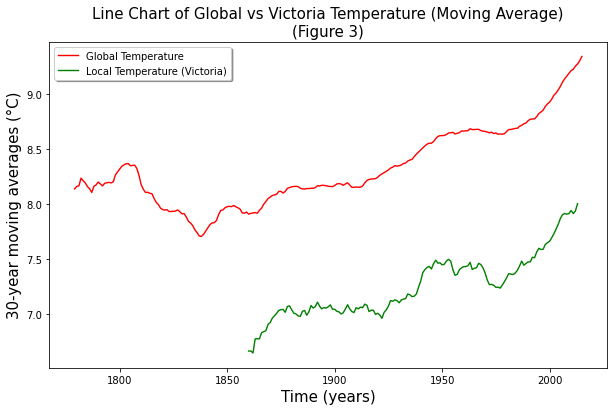

In [8]:
interval=30
global_moving_average_30=moving_average(df_global['avg_temp'].values,interval) #30-year moving averages 
# for global data

local_moving_average_30=moving_average(df_local_new['avg_temp'].values,interval)#30-year moving averages 
#for local data

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df_global['year'][interval-1:],global_moving_average_30,color="red",lw=1.4,label="Global Temperature")
plt.plot(df_local_new['year'][interval-1:],local_moving_average_30,color="green",lw=1.4,label="Local Temperature (Victoria)")
plt.title("Line Chart of Global vs Victoria Temperature (Moving Average)\n(Figure 3)",fontsize=15)
plt.ylabel(f"{interval}-year moving averages (°C)",fontsize=15)
plt.xlabel("Time (years)",fontsize=15)
plt.legend(shadow=True)

## Summary statistics for the global and local temperature

In [9]:
print ("The summary statistics for the global data are \n")
print(df_global.describe(),"\n")

print ("The summary statistics for the local data are \n")
print(df_local_new.describe(),"\n")

The summary statistics for the global data are 

              year    avg_temp
count   266.000000  266.000000
mean   1882.500000    8.369474
std      76.931788    0.584747
min    1750.000000    5.780000
25%    1816.250000    8.082500
50%    1882.500000    8.375000
75%    1948.750000    8.707500
max    2015.000000    9.830000 

The summary statistics for the local data are 

              year    avg_temp
count   183.000000  183.000000
mean   1921.890710    7.259126
std      53.149065    0.771946
min    1828.000000    3.250000
25%    1876.500000    6.760000
50%    1922.000000    7.230000
75%    1967.500000    7.735000
max    2013.000000    9.850000 



## Visualize the relationship between local and global data using a scatterplot and compute the correlation coeficient

Text(0.5, 1.0, 'Relationship between local and global data')

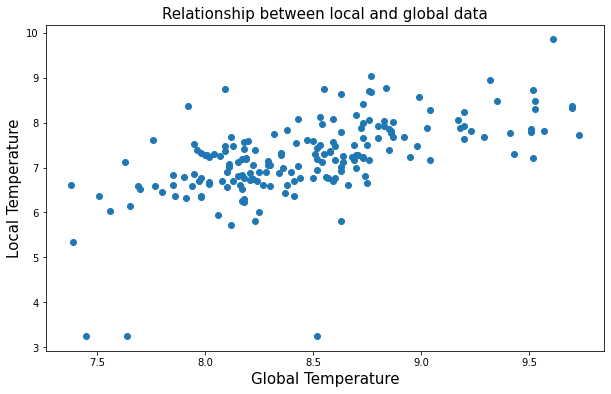

In [10]:
avg_global_temp=df_global.set_index('year') # we set new index so that we can select common years for both 
# the global and local temperature data 

df_local_imputed=df_local.fillna(method="bfill") #Fill the null values using bfill method

plt.figure(figsize=(10,6))

plt.scatter(avg_global_temp.loc[1828:2013].values,df_local_imputed['avg_temp'].values)
plt.xlabel("Global Temperature",fontsize=15)
plt.ylabel("Local Temperature",fontsize=15)
plt.title('Relationship between local and global data',fontsize=15)

### The above scattterplot shows some linear relationship between two variables

In [11]:
corr=np.corrcoef(avg_global_temp.loc[1828:2013]['avg_temp'],df_local_imputed['avg_temp'].values)
print("The correlation coefficient is ",corr[0,1])

The correlation coefficient is  0.5937480109214744


### Fit the least square line to the data using statsmodels library. This line will enable us to make predictions based on global temperatures averages. 

The least square line, according to the code below is,
$$ \text{local_temp}=1.0490 \text{global_temp}-1.6685$$


In [12]:
import statsmodels.api as sm
X=avg_global_temp.loc[1828:2013]['avg_temp'].values
X = sm.add_constant(X)
y=df_local_imputed['avg_temp'].values

In [13]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     100.2
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           4.20e-19
Time:                        20:30:16   Log-Likelihood:                -198.78
No. Observations:                 186   AIC:                             401.6
Df Residuals:                     184   BIC:                             408.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6685      0.890     -1.875      0.0